In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans,AgglomerativeClustering,DBSCAN,SpectralClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import tree
from sklearn import metrics

import warnings
warnings.filterwarnings("ignore") 

In [2]:
df = pd.read_csv('D:\Github Files\Market_Segmentation\Customer Data.csv')
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [3]:
df.shape

(8950, 18)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [5]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [6]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


## Basic EDA

In [7]:
df.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

In [8]:
## Filling the null values in the dataset 
df['MINIMUM_PAYMENTS']=df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].mean())
df['CREDIT_LIMIT']=df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].mean())

In [9]:
df.duplicated().sum()

0

In [10]:
df = df.drop(columns=['CUST_ID'], axis=1)

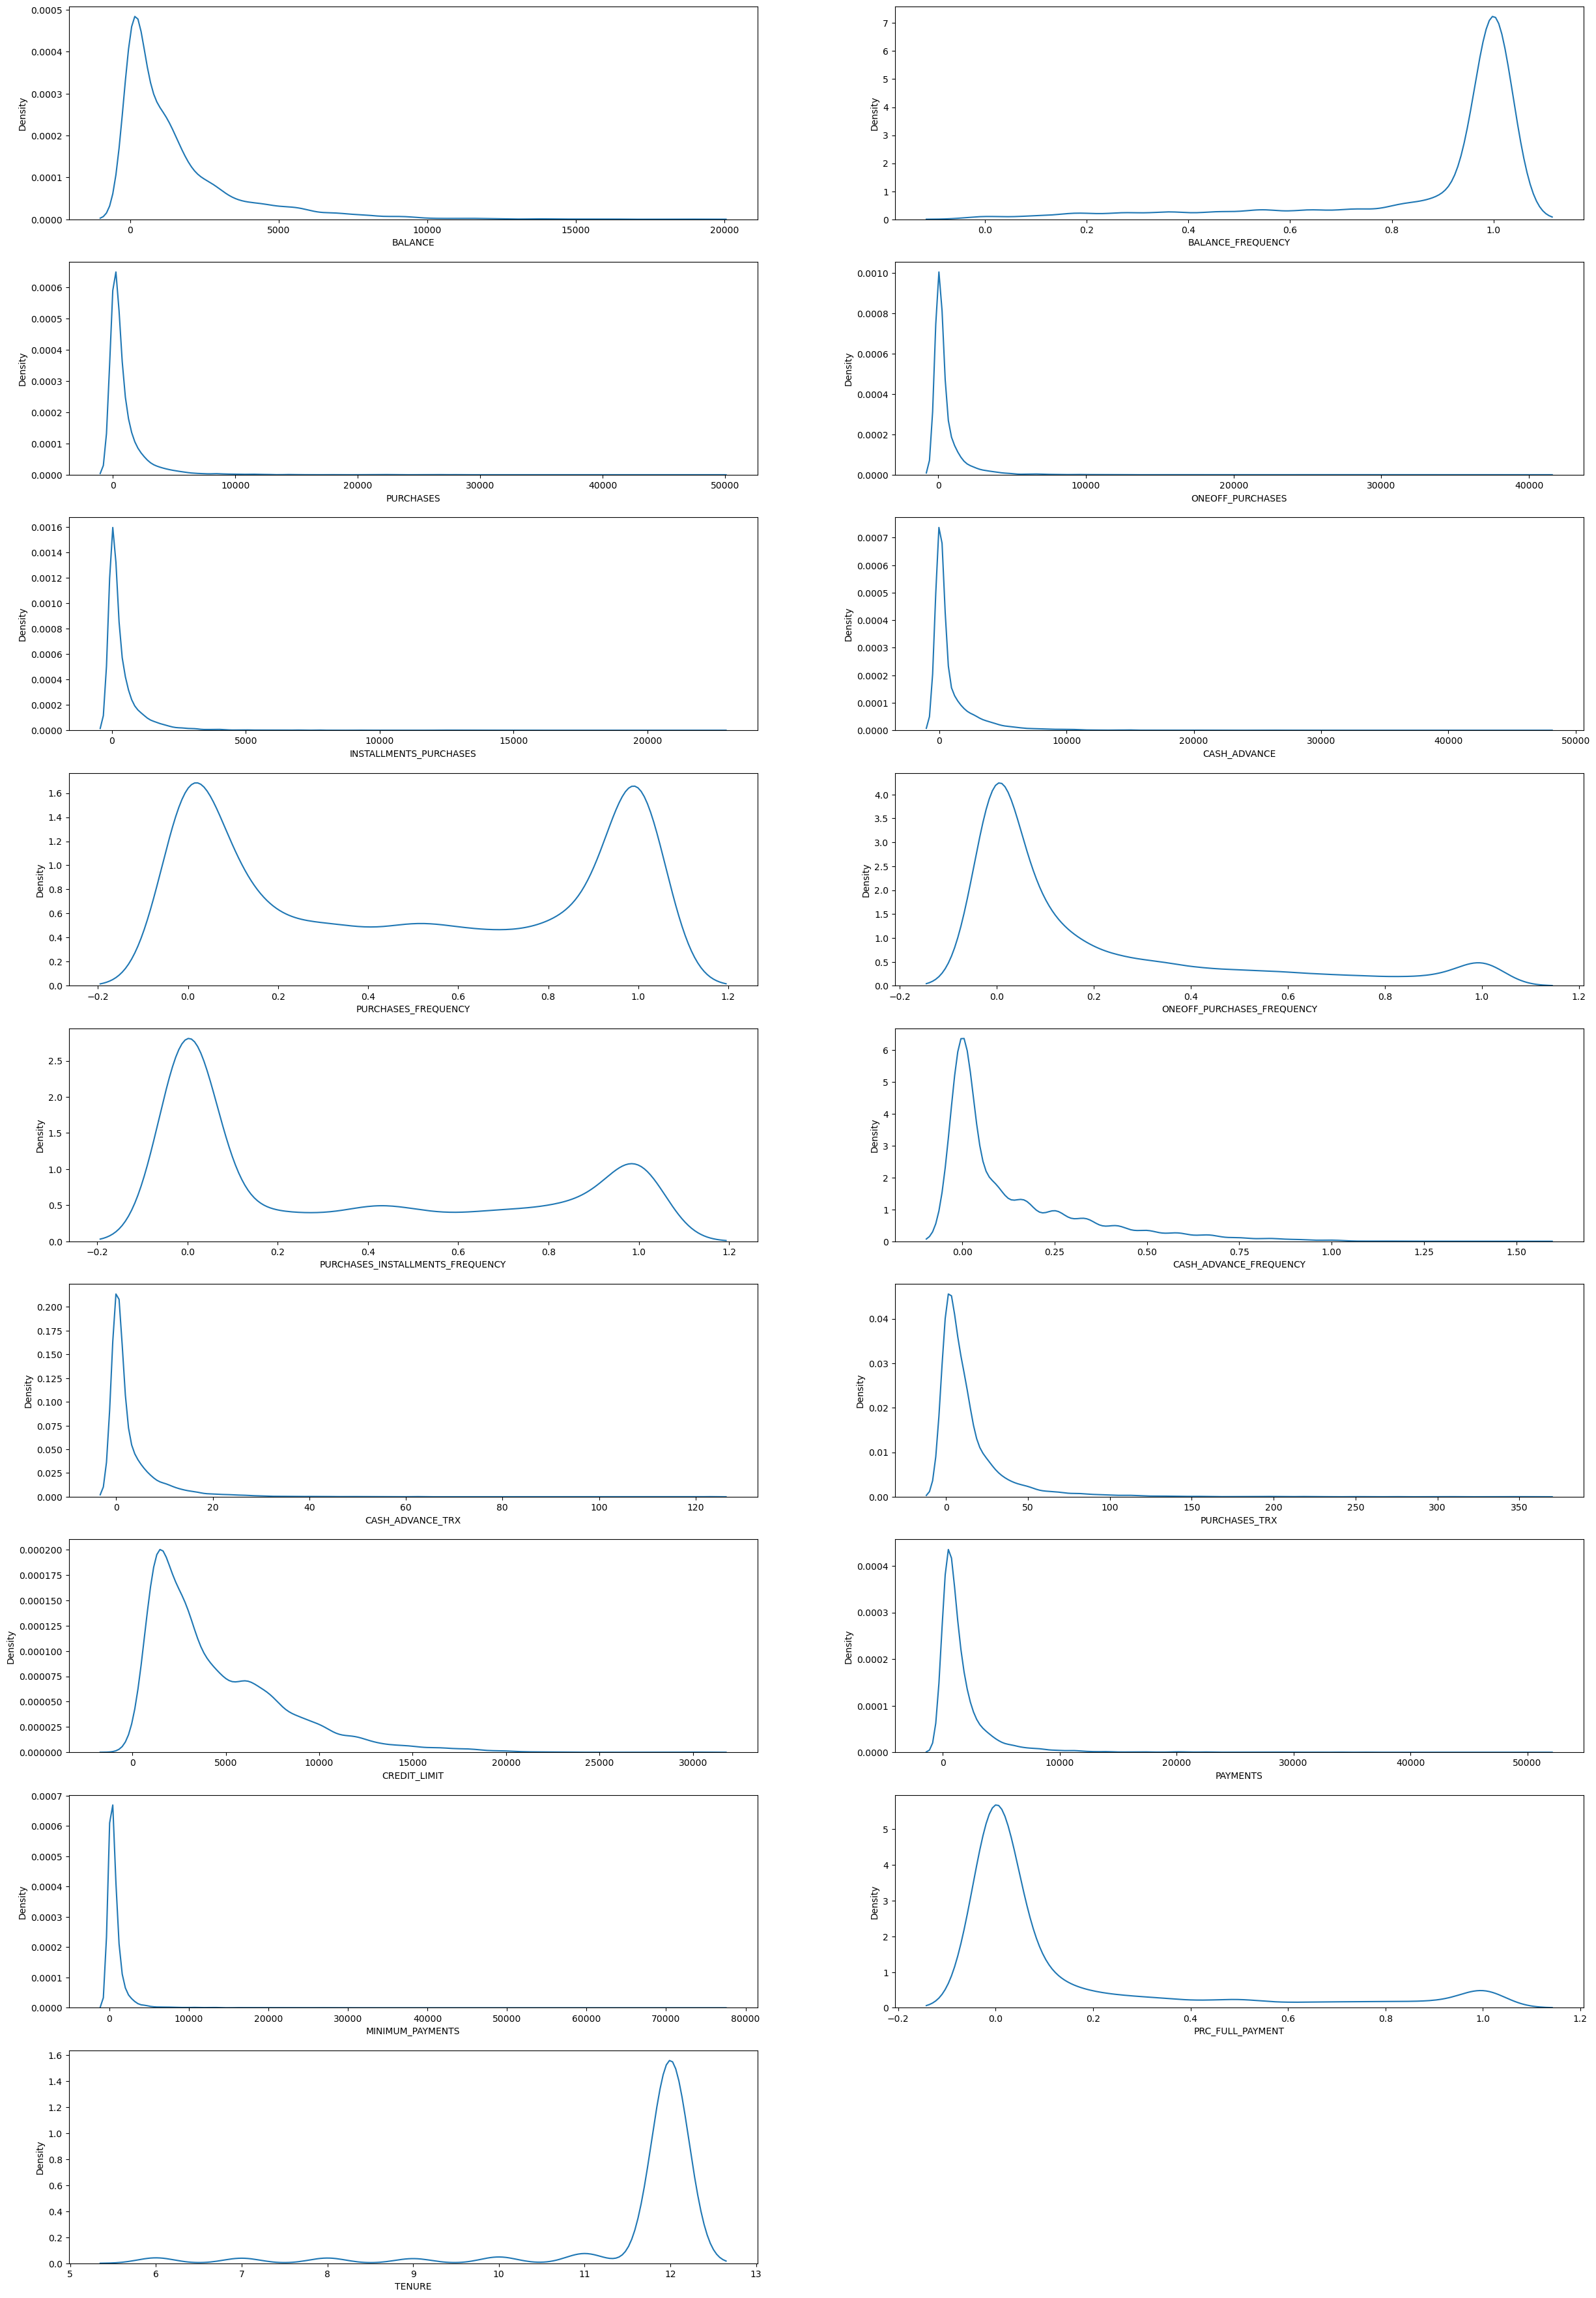

In [11]:
plt.figure(figsize=(30,45))
for i, col in enumerate(df.columns): 
    if df[col].dtype != 'object': 
        ax = plt.subplot(9, 2, i+1)
        sns.kdeplot(df[col], ax = ax)
        plt.xlabel(col)

plt.show()

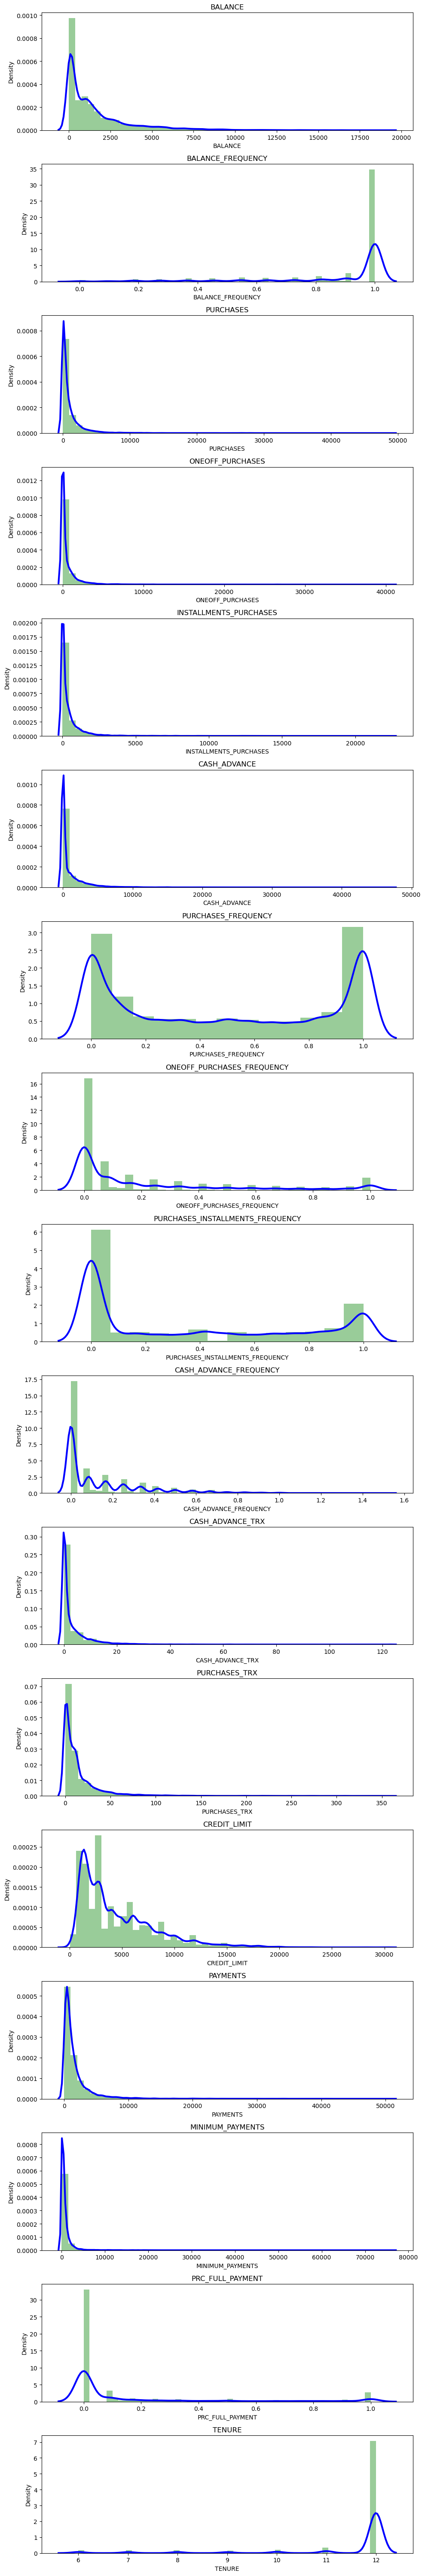

In [12]:
plt.figure(figsize=(10,60))
for i in range(0,17):
    plt.subplot(17,1,i+1)
    sns.distplot(df[df.columns[i]],kde_kws={'color':'b','bw': 0.1,'lw':3,'label':'KDE'},hist_kws={'color':'g'})
    plt.title(df.columns[i])
plt.tight_layout()

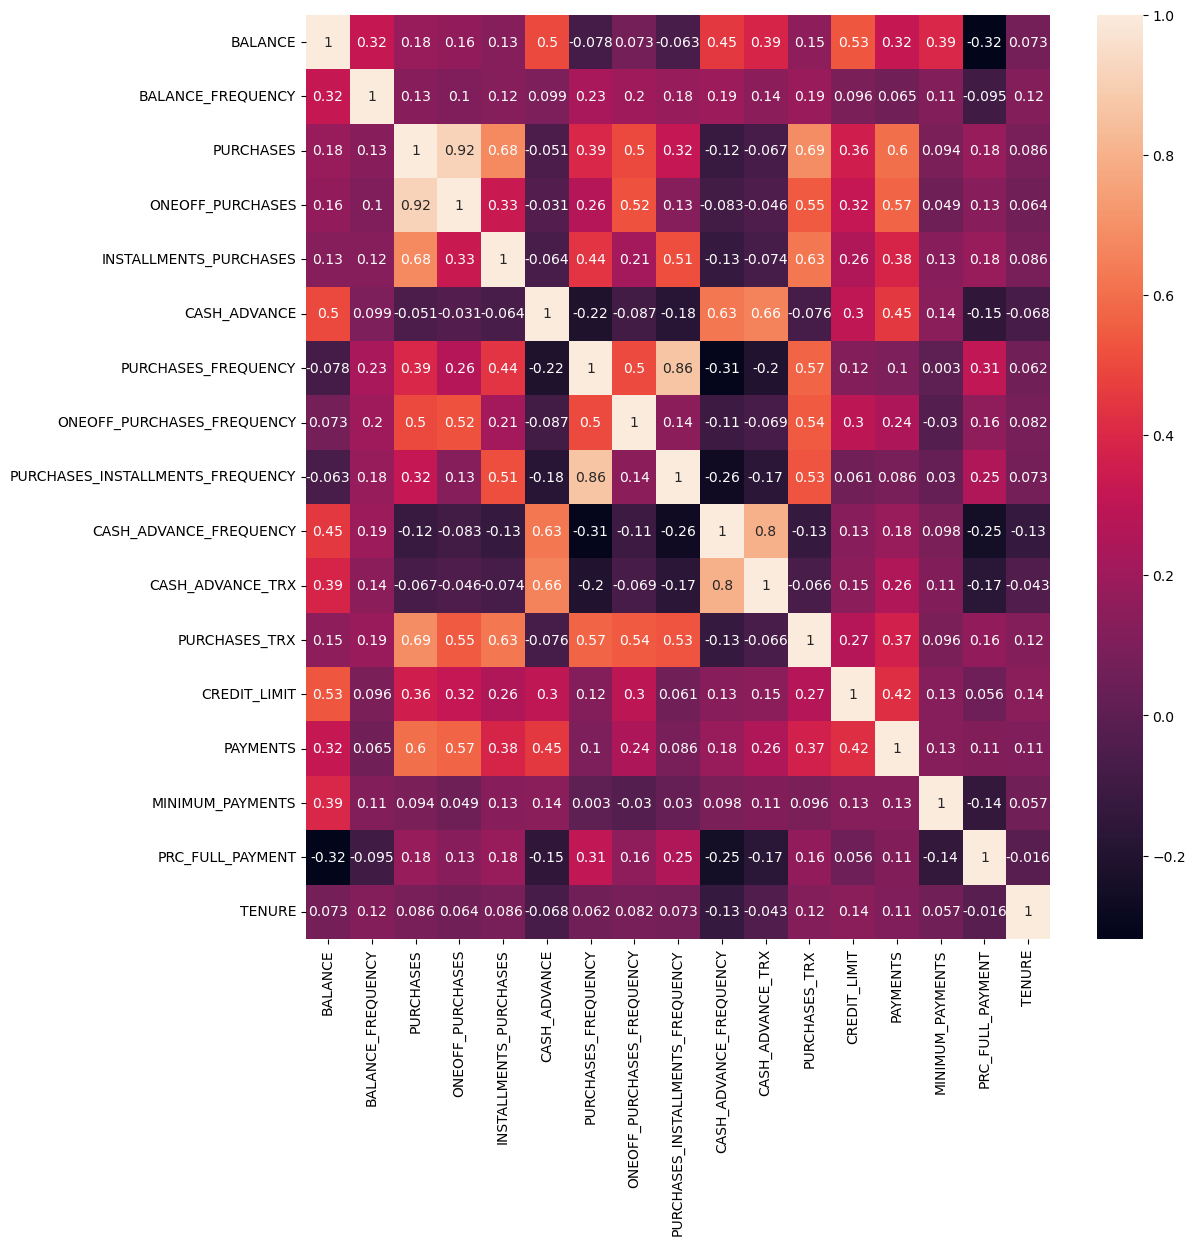

In [13]:
plt.figure(figsize=(12,12)) 
box = sns.heatmap(df.corr(), annot=True)
plt.show()

In [14]:
# def correlation(dataset, threshold):
#     col_corr = set()
#     corr_matrix = df.corr()

#     for i in range(len(corr_matrix.columns)): 
#         for j in range(i):
#             if abs(corr_matrix.iloc[i,j] > threshold):
#                 colname = corr_matrix.columns[i] 
#                 col_corr.add(colname)
#     return col_corr 
                

In [15]:
# correlation(df, 0.6)

## Scaling the Data

In [16]:
scaler=StandardScaler()
scaled_df = scaler.fit_transform(df)

In [17]:
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [18]:
scaled_df = scaler.fit_transform(df)


## Dimensionality reduction
Converting the DataFrame into 2D DataFrame for visualization

In [19]:
pca = PCA(n_components=2)
principal_component = pca.fit_transform(scaled_df)
pca_df = pd.DataFrame(data=principal_component, columns=["PCA1","PCA2"])
pca_df

,PCA1,PCA2
0,-1.682220,-1.076451
1,-1.138295,2.506477
2,0.969684,-0.383520
3,-0.873628,0.043166
4,-1.599434,-0.688581
...,...,...
8945,-0.359629,-2.016145
8946,-0.564369,-1.639123
8947,-0.926204,-1.810786
8948,-2.336552,-0.657966


## Hyperparameter tuning

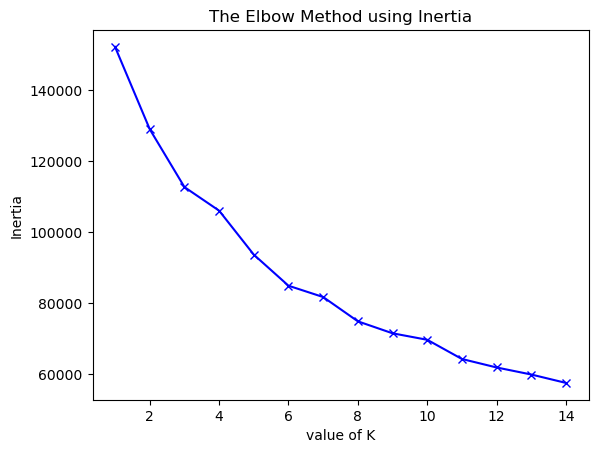

In [20]:
inertia = []
range_ = range(1,15)
for i in range_: 
    kmean = KMeans(n_clusters=i)
    kmean.fit_predict(pd.DataFrame(scaled_df))
    inertia.append(kmean.inertia_)
plt.plot(range_, inertia, 'bx-')
plt.xlabel("value of K")
plt.ylabel("Inertia")
plt.title("The Elbow Method using Inertia")
plt.show()

## Model Building Using KMeans

In [21]:
kmeans_model = KMeans(n_clusters=4)
kmeans_model.fit_predict(scaled_df)
pca_df_kmeans = pd.concat([pca_df, pd.DataFrame({'cluster':kmeans_model.labels_})], axis=1)
pca_df_kmeans

,PCA1,PCA2,cluster
0,-1.682220,-1.076451,0
1,-1.138295,2.506477,1
2,0.969684,-0.383520,2
3,-0.873628,0.043166,0
4,-1.599434,-0.688581,0
...,...,...,...
8945,-0.359629,-2.016145,2
8946,-0.564369,-1.639123,2
8947,-0.926204,-1.810786,2
8948,-2.336552,-0.657966,0


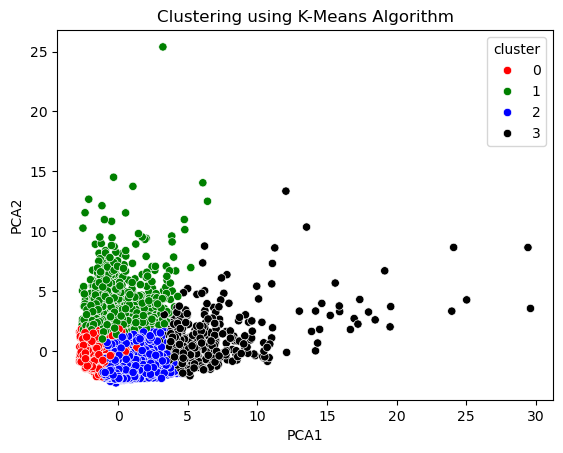

In [22]:
ax = sns.scatterplot(x='PCA1', y='PCA2', data=pca_df_kmeans, hue='cluster',palette=['red','green','blue','black'])
plt.title("Clustering using K-Means Algorithm")
plt.show()

In [23]:
## Cluster Centers 
cluster_center = pd.DataFrame(data=kmeans_model.cluster_centers_, columns=[df.columns])
cluster_center = scaler.inverse_transform(cluster_center)
cluster_center = pd.DataFrame(data = cluster_center, columns=df.columns)
cluster_center

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,992.075922,0.787330,272.285314,210.666144,61.887068,580.026226,0.173146,0.086941,0.082863,0.112550,2.073177,2.943477,3264.710518,967.079503,571.884721,0.078629,11.444108
1,4559.476191,0.968704,487.498350,310.225537,177.355472,4450.837789,0.282432,0.136274,0.181114,0.480152,14.081301,7.466667,7467.849224,3425.128274,2012.554946,0.035192,11.391870
2,897.602738,0.936733,1240.220030,596.048530,644.447353,210.989794,0.886461,0.297750,0.713248,0.042703,0.792053,22.165223,4218.784061,1336.304693,651.997165,0.269945,11.596952
3,3556.148177,0.986911,7680.432073,5099.738293,2582.157195,686.680975,0.946548,0.739667,0.788577,0.073149,2.170732,89.309756,9711.097561,7301.419079,1977.054411,0.286211,11.951220


In [24]:
cluster_df = pd.concat([df, pd.DataFrame({'cluster':kmeans_model.labels_})], axis=1)
cluster_df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,1
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,2
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,0
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6,2
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,864.206542,0.000000,6,2
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6,2
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6,0


In [25]:
cluster_df[cluster_df['cluster']==0].head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.0,12,0
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.0,12,0
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.0,12,0
8,1014.926473,1.000000,861.49,661.49,200.0,0.000000,0.333333,0.083333,0.250000,0.000000,0,5,7000.0,688.278568,311.963409,0.0,12,0
9,152.225975,0.545455,1281.60,1281.60,0.0,0.000000,0.166667,0.166667,0.000000,0.000000,0,3,11000.0,1164.770591,100.302262,0.0,12,0


<Axes: xlabel='cluster', ylabel='count'>

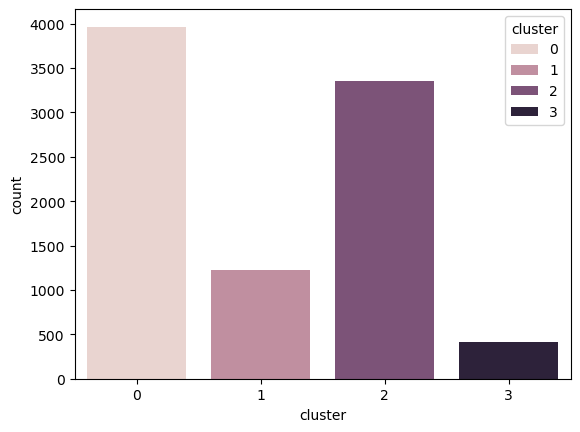

In [26]:
sns.countplot(data=cluster_df, x = 'cluster', hue='cluster')

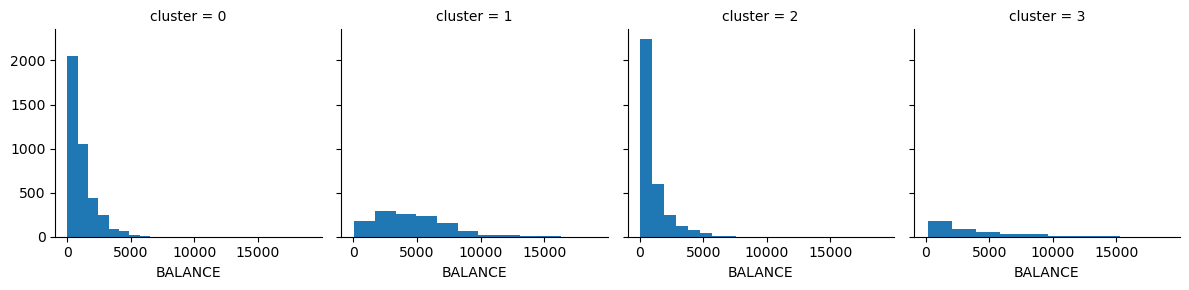

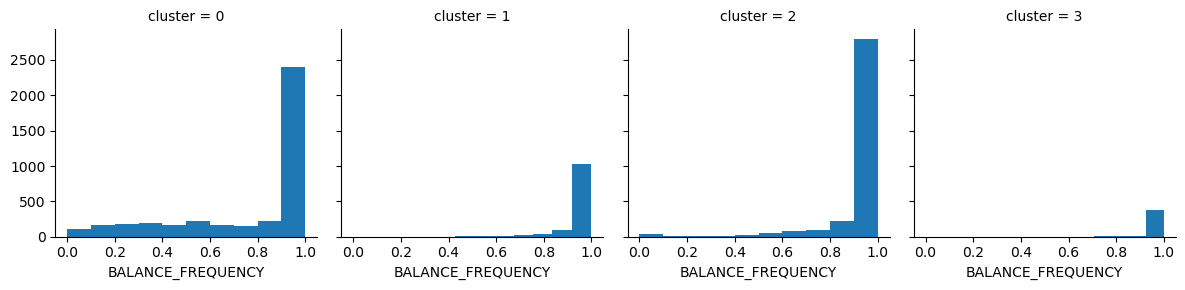

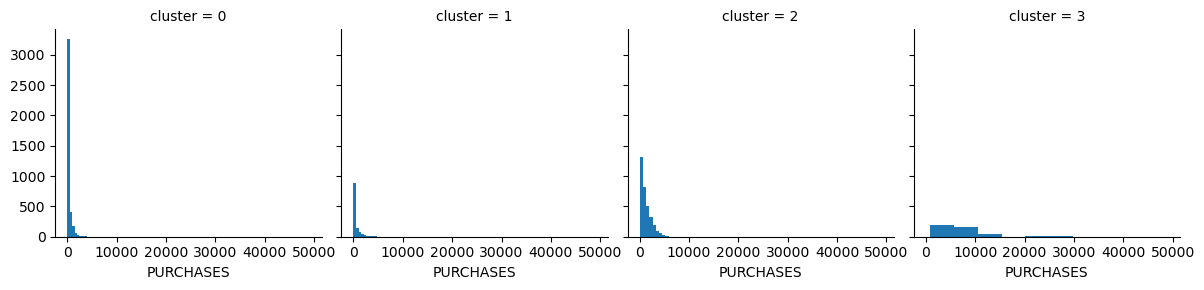

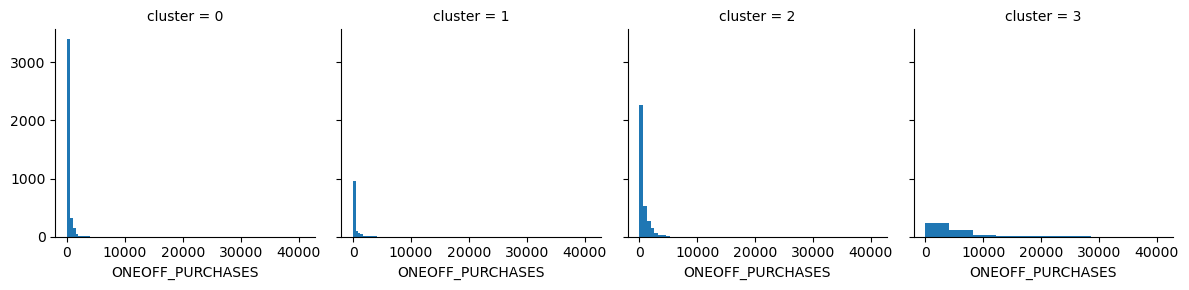

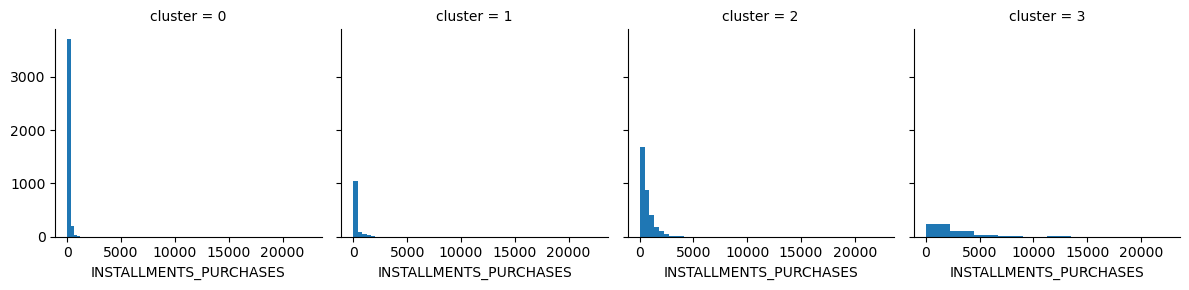

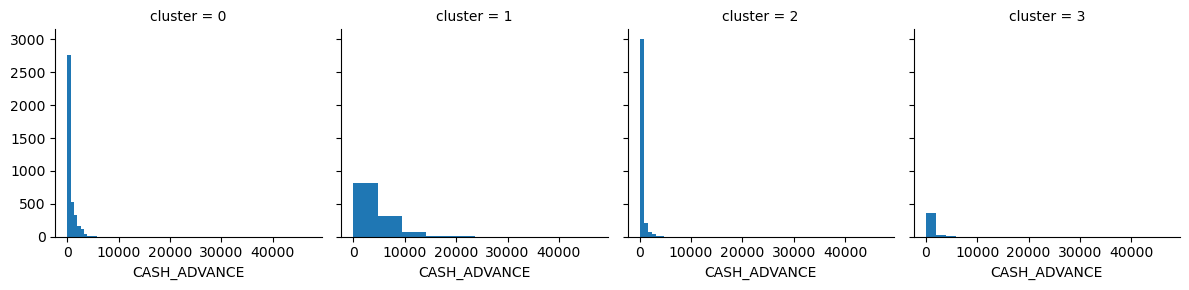

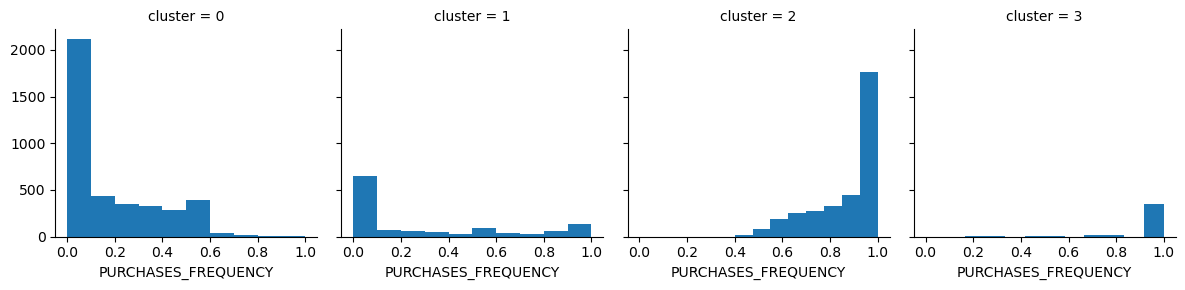

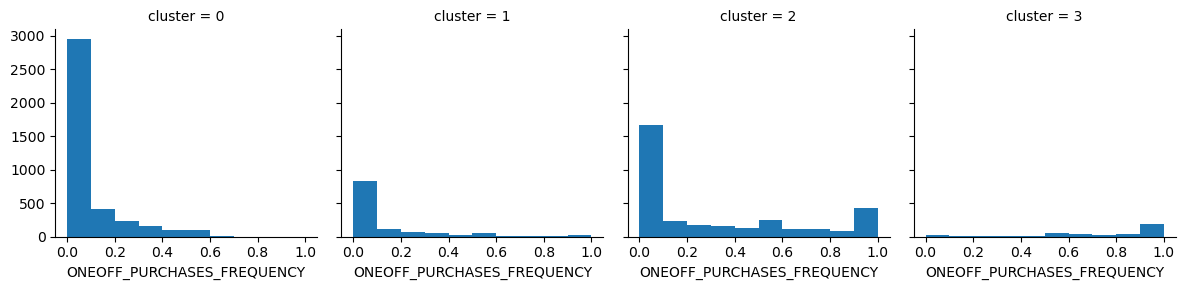

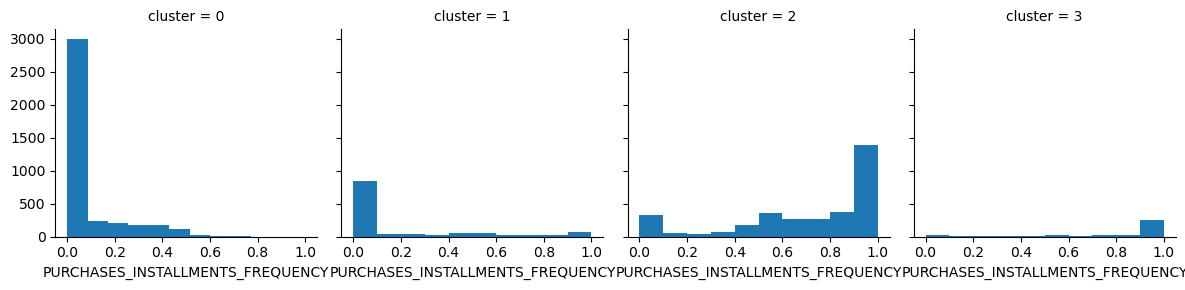

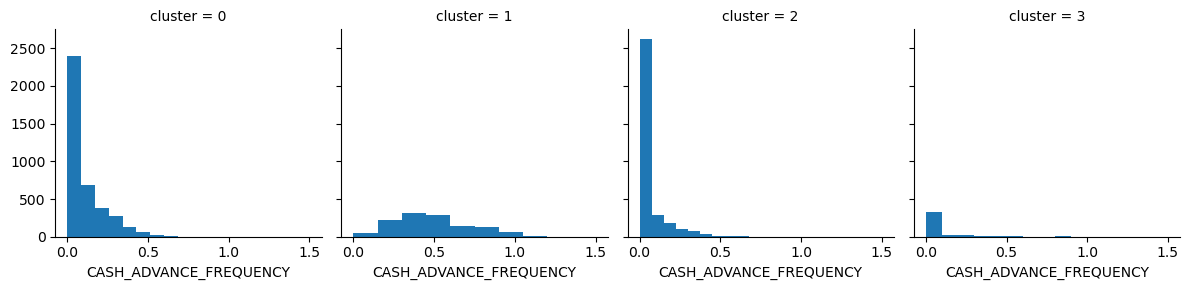

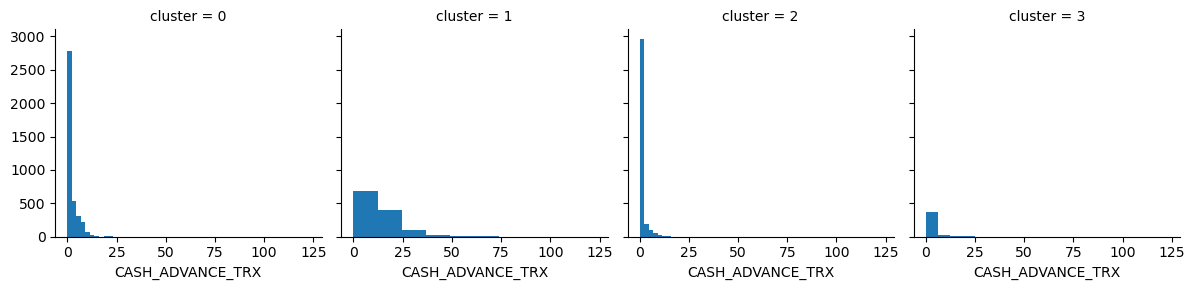

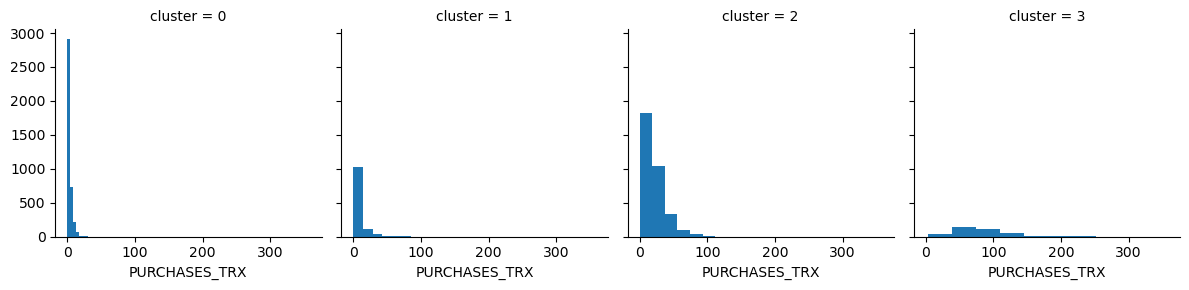

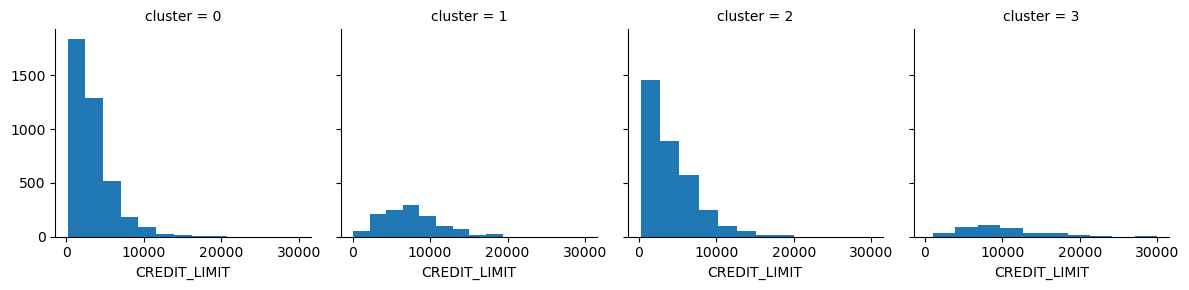

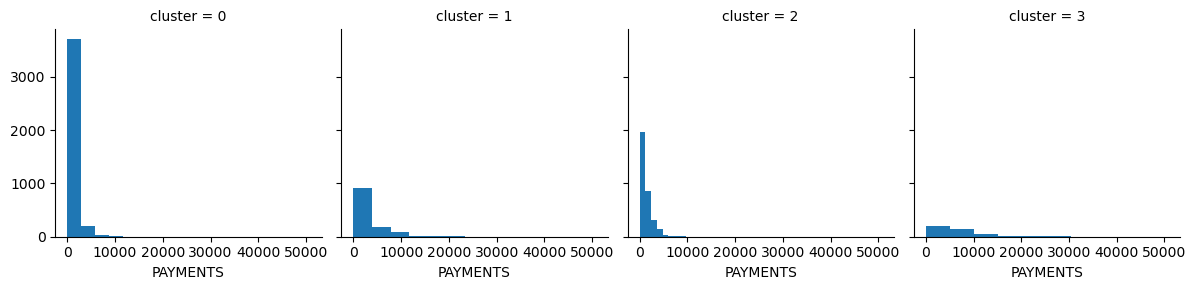

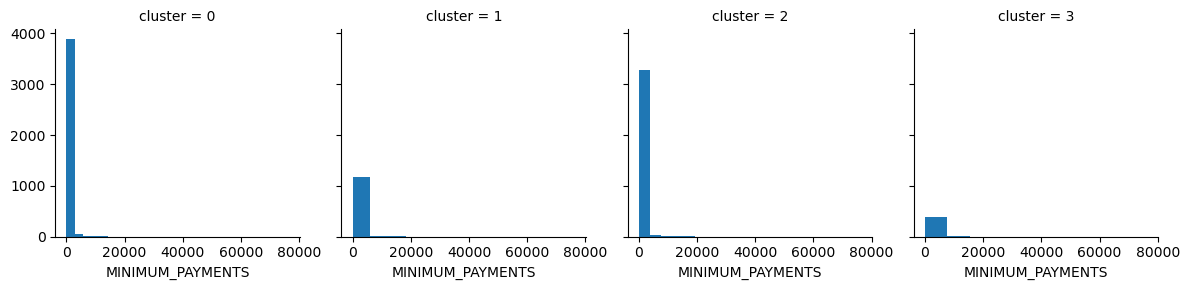

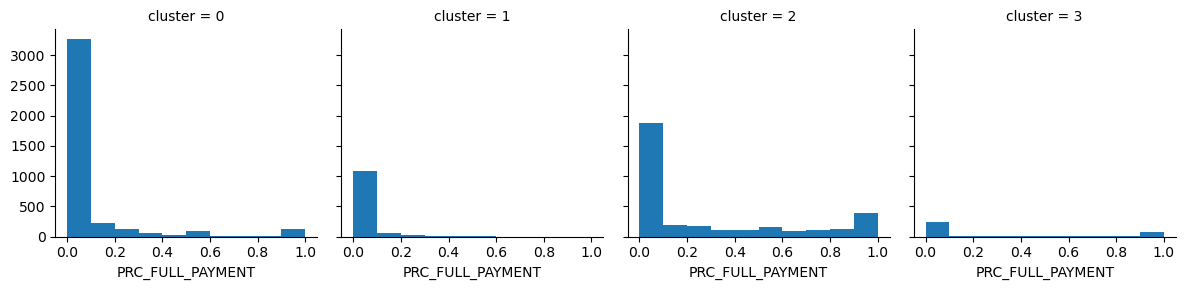

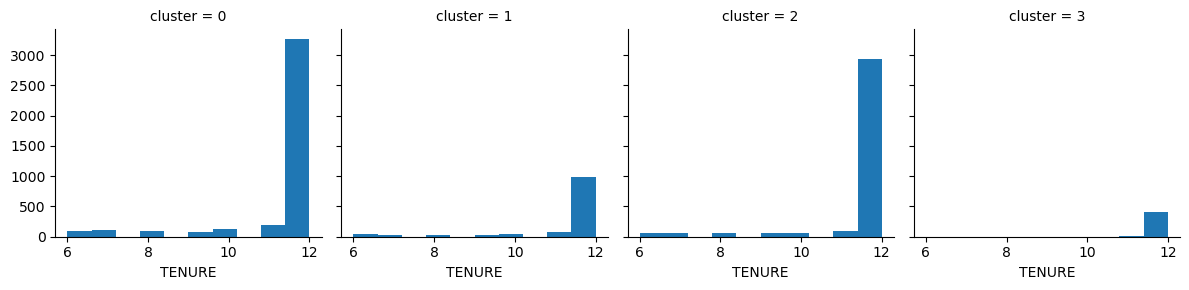

In [27]:
for c in cluster_df.drop(['cluster'],axis=1): 
    grid = sns.FacetGrid(cluster_df, col='cluster')
    grid = grid.map(plt.hist, c)
plt.show()

In [30]:
import pickle
with open("kmeans_model.pkl", 'wb') as file:
    pickle.dump(kmeans_model, file)

In [31]:
cluster_df.to_csv("Clustered_customer_data.csv")


## Train and Test the model 

In [32]:
X = cluster_df.drop(['cluster'], axis=1)
y = cluster_df[['cluster']]
print(type(y))
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.3)


<class 'pandas.core.frame.DataFrame'>


In [33]:
X_train

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
5893,2932.111796,1.000000,346.32,346.32,0.00,2631.304016,0.333333,0.333333,0.000000,0.333333,10,9,6000.0,597.514300,784.577784,0.000000,12
4650,398.726283,1.000000,393.49,393.49,0.00,787.215403,0.166667,0.166667,0.000000,0.250000,8,12,600.0,795.860389,213.548011,0.000000,12
1228,1.019189,0.090909,87.02,0.00,87.02,0.000000,0.083333,0.000000,0.083333,0.000000,0,1,15500.0,0.000000,864.206542,0.000000,12
8,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,0.000000,0,5,7000.0,688.278568,311.963409,0.000000,12
6196,1276.819142,1.000000,710.20,710.20,0.00,742.511085,0.416667,0.416667,0.000000,0.250000,4,8,3700.0,3144.534957,477.522969,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1070,1050.926790,1.000000,150.00,0.00,150.00,114.462798,0.500000,0.000000,0.500000,0.083333,1,6,1000.0,238.619393,5303.958597,0.000000,12
897,11.357740,0.555556,223.50,175.50,48.00,0.000000,0.333333,0.222222,0.111111,0.000000,0,4,17500.0,192.806010,95.228179,0.000000,9
4497,72.425884,1.000000,655.68,0.00,655.68,0.000000,1.000000,0.000000,1.000000,0.000000,0,0,1000.0,718.537117,162.732686,0.333333,12
526,5083.397311,1.000000,331.95,331.95,0.00,10384.824160,0.200000,0.200000,0.000000,0.800000,31,2,8000.0,4453.691497,1088.959964,0.000000,10


In [34]:
## Decision Tree 
model = DecisionTreeClassifier(criterion='entropy')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [35]:
#Confusion_Matrix
print(metrics.confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1131   22   21    2]
 [  22  311   20    2]
 [  24   12 1002    7]
 [   1    2   11   95]]
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1176
           1       0.90      0.88      0.89       355
           2       0.95      0.96      0.95      1045
           3       0.90      0.87      0.88       109

    accuracy                           0.95      2685
   macro avg       0.93      0.92      0.92      2685
weighted avg       0.95      0.95      0.95      2685



In [36]:
import pickle 
filename = 'final_model.'
pickle.dump(model,open(filename, 'wb'))

In [37]:
loaded_model = pickle.load(open(filename,'rb'))
result = loaded_model.score(X_test, y_test)
result

0.9456238361266294